# CIA Country Analysis and Clustering


Source: All these data sets are made up of data from the US government. 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

NOTE:
Dataset found in: https://www.openintro.org/data/index.php?data=cia_factbook
<br>Downloaded as .CVS file, located in Assignments folder.
<br>Results have been revised due to the differences in variables from the dataset being used

## Goal: 

### Gain insights into similarity between countries and regions of the world by experimenting with K-Means Clustering
----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Perform Exploratory Data Analysis

In [2]:
df = pd.read_csv('cia_factbook.csv')
df.variables = df.columns
print(df.variables)

df.info()

Index(['country', 'area', 'birth_rate', 'death_rate', 'infant_mortality_rate',
       'internet_users', 'life_exp_at_birth', 'maternal_mortality_rate',
       'net_migration_rate', 'population', 'population_growth_rate'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  259 non-null    object 
 1   area                     257 non-null    float64
 2   birth_rate               224 non-null    float64
 3   death_rate               225 non-null    float64
 4   infant_mortality_rate    224 non-null    float64
 5   internet_users           213 non-null    float64
 6   life_exp_at_birth        224 non-null    float64
 7   maternal_mortality_rate  184 non-null    float64
 8   net_migration_rate       222 non-null    float64
 9   population               238 non-null    float64
 10

C:\Users\andyb\AppData\Local\Temp\ipykernel_14968\1981914876.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.variables = df.columns


In [3]:
df.head()

,country,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate
0,Russia,17098242.0,11.87,13.83,7.08,40853000.0,70.16,34.0,1.69,1.424703e+08,-0.03
1,Canada,9984670.0,10.29,8.31,4.71,26960000.0,81.67,12.0,5.66,3.483484e+07,0.76
2,United States,9826675.0,13.42,8.15,6.17,245000000.0,79.56,21.0,2.45,3.188921e+08,0.77
3,China,9596960.0,12.17,7.44,14.79,389000000.0,75.15,37.0,-0.32,1.355693e+09,0.44
4,Brazil,8514877.0,14.72,6.54,19.21,75982000.0,73.28,56.0,-0.15,2.026568e+08,0.80


In [4]:
df.isna().sum()

country                     0
area                        2
birth_rate                 35
death_rate                 34
infant_mortality_rate      35
internet_users             46
life_exp_at_birth          35
maternal_mortality_rate    75
net_migration_rate         37
population                 21
population_growth_rate     26
dtype: int64

In [5]:
# Display basic information about the dataset
print("Basic information about the dataset:")
print(df.info())

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(df.describe())

# Check for missing values
print("\nNumber of missing values in each column:")
print(df.isna().sum())

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  259 non-null    object 
 1   area                     257 non-null    float64
 2   birth_rate               224 non-null    float64
 3   death_rate               225 non-null    float64
 4   infant_mortality_rate    224 non-null    float64
 5   internet_users           213 non-null    float64
 6   life_exp_at_birth        224 non-null    float64
 7   maternal_mortality_rate  184 non-null    float64
 8   net_migration_rate       222 non-null    float64
 9   population               238 non-null    float64
 10  population_growth_rate   233 non-null    float64
dtypes: float64(10), object(1)
memory usage: 22.4+ KB
None

First few rows of the dataset:
         country        area  birth_rate  death_rate  infant_mort

c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


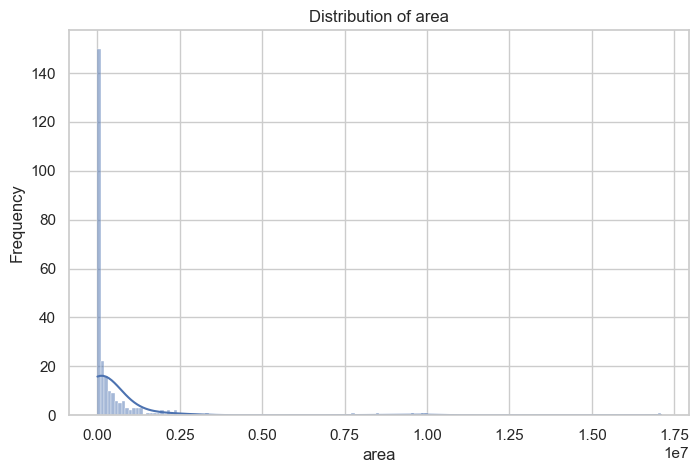

c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


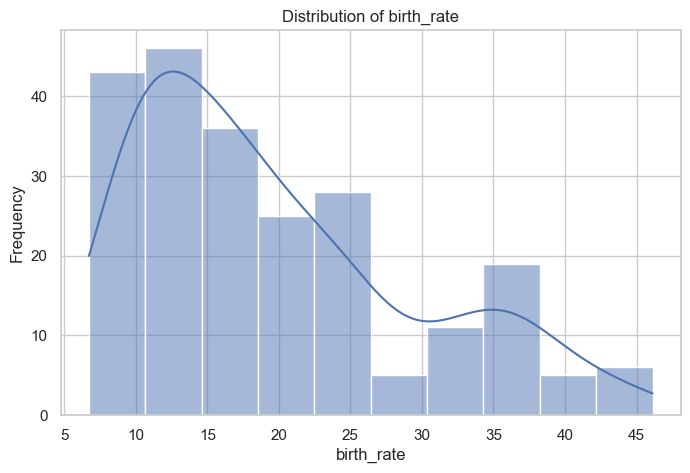

c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


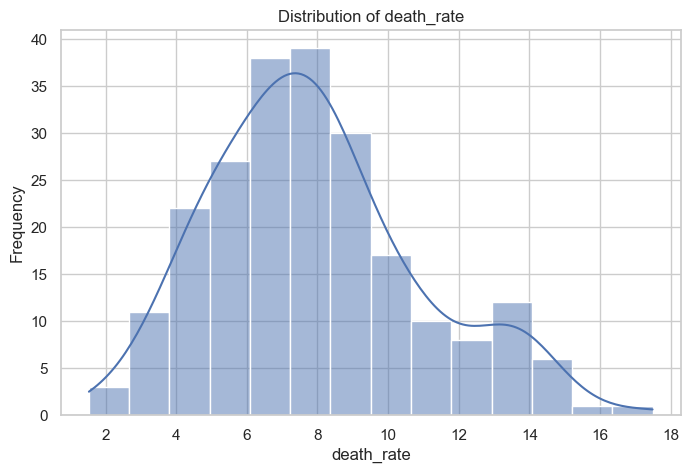

c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


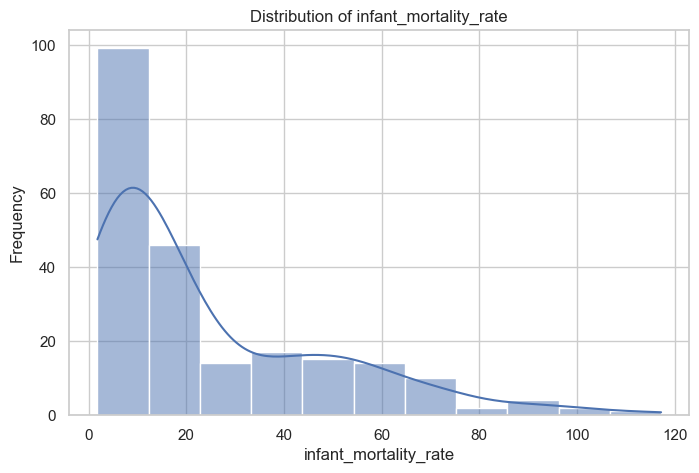

c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


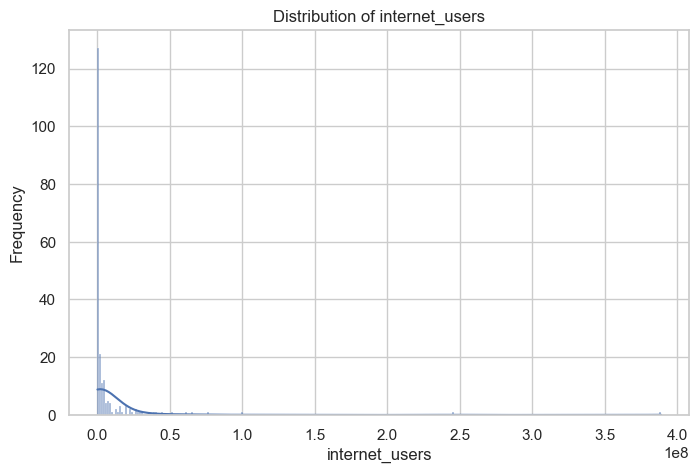

c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


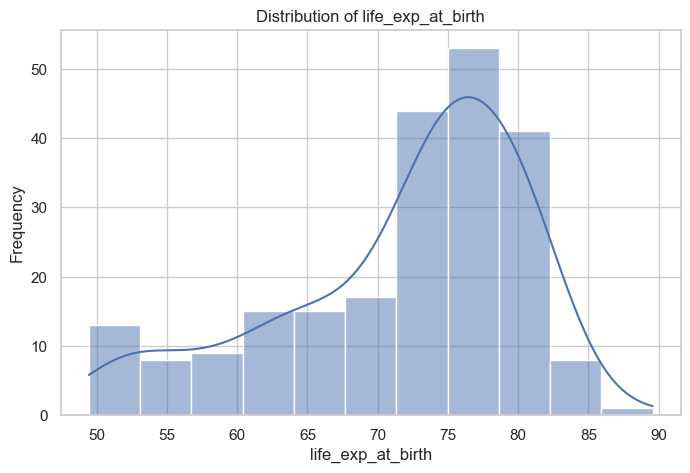

c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


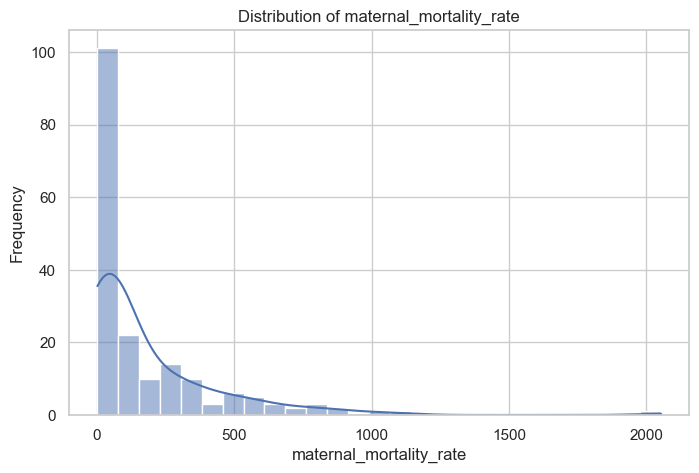

c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


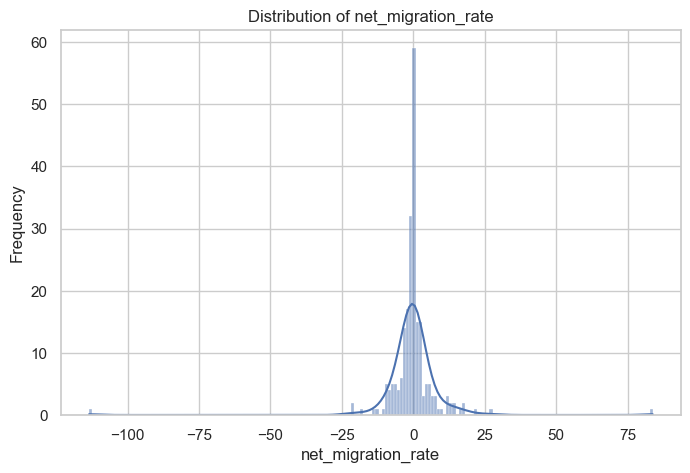

c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


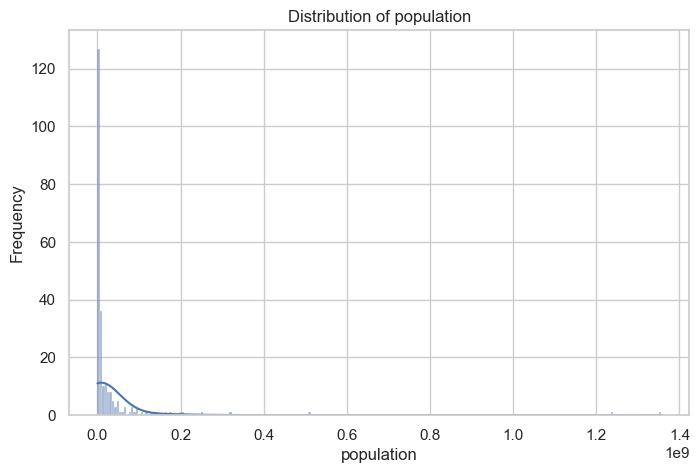

c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


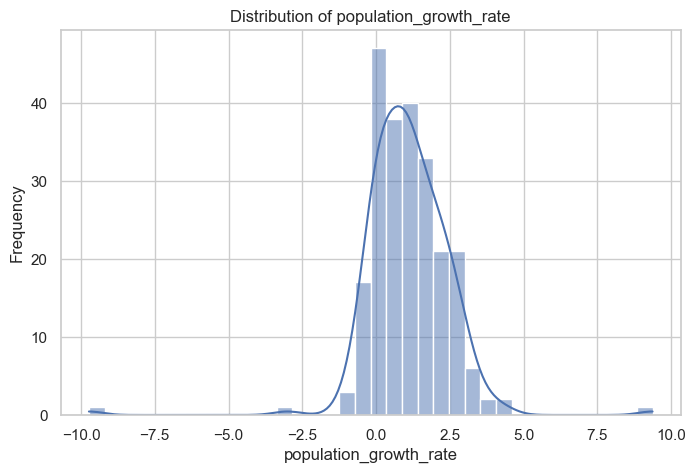

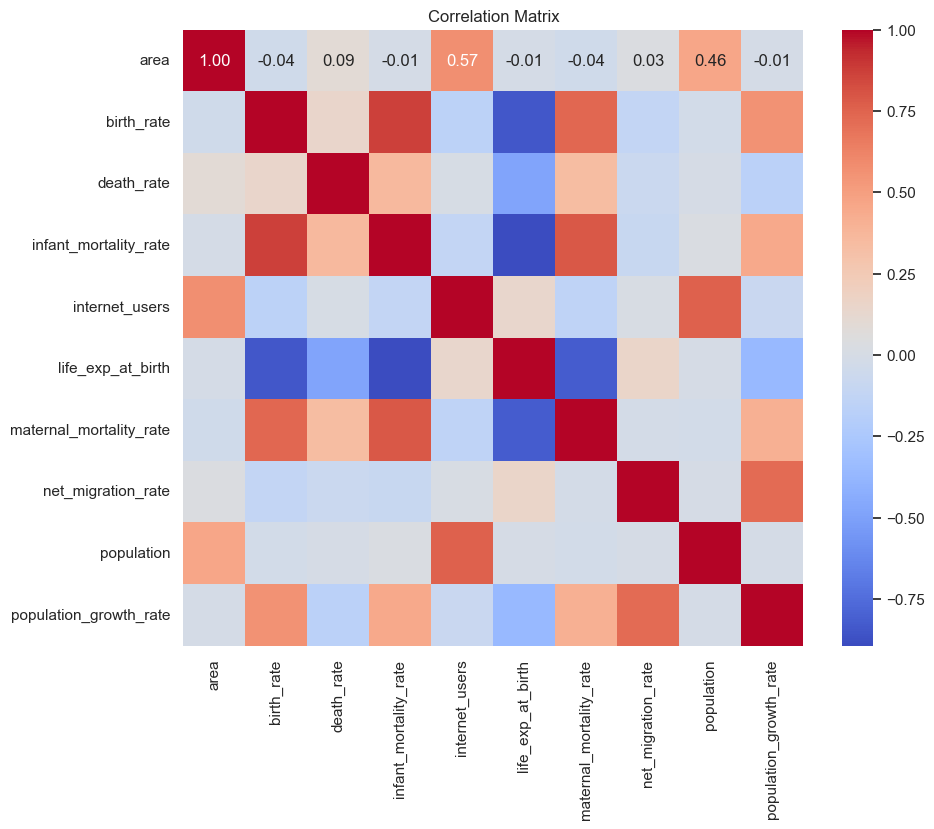

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['float64'])

sns.set_theme(style="whitegrid")

# Plot histograms for numerical columns
num_cols = numeric_df.columns
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=numeric_df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

-----

## 2. Feature Engineering for Missing Data

**TASK: What countries have NaN for Agriculture? What is the main aspect of these countries?**
<br>
*NOTE! using the death rate in this context*

In [7]:
df.isna().sum()

country                     0
area                        2
birth_rate                 35
death_rate                 34
infant_mortality_rate      35
internet_users             46
life_exp_at_birth          35
maternal_mortality_rate    75
net_migration_rate         37
population                 21
population_growth_rate     26
dtype: int64

In [8]:
# Filter rows with NaN values in the 'death_rate' column
nan_death_rate_countries = df[df['death_rate'].isna()]

# Display the countries with NaN values for death_rate
print("Countries with NaN values for death_rate:")
print(nan_death_rate_countries[['country', 'death_rate']])

# Explore other aspects of these countries
print("\nMain aspects of these countries:")
print(nan_death_rate_countries.describe(include='all'))


Countries with NaN values for death_rate:
                                           country  death_rate
124                                       Svalbard         NaN
163              Falkland Islands (Islas Malvinas)         NaN
167                                         Kosovo         NaN
208                                           Niue         NaN
217                               Christmas Island         NaN
223                                   Saint Martin         NaN
225                               Pitcairn Islands         NaN
226                                 Norfolk Island         NaN
231                        Cocos (Keeling) Islands         NaN
232                                        Tokelau         NaN
235                        Holy See (Vatican City)         NaN
236                                      Jan Mayen         NaN
237                                 Howland Island         NaN
238              Heard Island and McDonald Islands         NaN
239       Sou

**TASK: Notice climate is missing for a few countries, but not the Region! Let's use this to our advantage. Fill in the missing Climate values based on the mean climate value for its region.**
<br>
*NOTE! using birth rate in this context, region is unavailable in this dataset, so I am using country*
<br>
Hints on how to do this: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group


In [9]:
# Fill missing birth_rate values based on mean birth_rate for each country
df['birth_rate'] = df.groupby('country')['birth_rate'].transform(lambda x: x.fillna(x.mean()))

# Fill remaining NaN values with overall mean birth_rate
overall_mean_birth_rate = df['birth_rate'].mean()
df['birth_rate'].fillna(overall_mean_birth_rate, inplace=True)
df


,country,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate
0,Russia,17098242.0,11.870000,13.83,7.08,40853000.0,70.16,34.0,1.69,1.424703e+08,-0.03
1,Canada,9984670.0,10.290000,8.31,4.71,26960000.0,81.67,12.0,5.66,3.483484e+07,0.76
2,United States,9826675.0,13.420000,8.15,6.17,245000000.0,79.56,21.0,2.45,3.188921e+08,0.77
3,China,9596960.0,12.170000,7.44,14.79,389000000.0,75.15,37.0,-0.32,1.355693e+09,0.44
4,Brazil,8514877.0,14.720000,6.54,19.21,75982000.0,73.28,56.0,-0.15,2.026568e+08,0.80
...,...,...,...,...,...,...,...,...,...,...,...
254,Bouvet Island,49.0,19.659063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,Palmyra Atoll,12.0,19.659063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Akrotiri,123.0,19.659063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,European Union,NaN,19.659063,NaN,4.33,NaN,80.02,NaN,NaN,5.114348e+08,NaN


**TASK:Use the same method for the missing values in Literacy.**
<br>
*NOTE! using life_exp_at_birth in this context*

In [10]:
df['life_exp_at_birth'] = df.groupby('country')['life_exp_at_birth'].transform(lambda x: x.fillna(x.mean()))

overall_mean_birth_rate = df['life_exp_at_birth'].mean()
df['life_exp_at_birth'].fillna(overall_mean_birth_rate, inplace=True)
df

,country,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate
0,Russia,17098242.0,11.870000,13.83,7.08,40853000.0,70.160000,34.0,1.69,1.424703e+08,-0.03
1,Canada,9984670.0,10.290000,8.31,4.71,26960000.0,81.670000,12.0,5.66,3.483484e+07,0.76
2,United States,9826675.0,13.420000,8.15,6.17,245000000.0,79.560000,21.0,2.45,3.188921e+08,0.77
3,China,9596960.0,12.170000,7.44,14.79,389000000.0,75.150000,37.0,-0.32,1.355693e+09,0.44
4,Brazil,8514877.0,14.720000,6.54,19.21,75982000.0,73.280000,56.0,-0.15,2.026568e+08,0.80
...,...,...,...,...,...,...,...,...,...,...,...
254,Bouvet Island,49.0,19.659063,NaN,NaN,NaN,71.826875,NaN,NaN,NaN,NaN
255,Palmyra Atoll,12.0,19.659063,NaN,NaN,NaN,71.826875,NaN,NaN,NaN,NaN
256,Akrotiri,123.0,19.659063,NaN,NaN,NaN,71.826875,NaN,NaN,NaN,NaN
257,European Union,NaN,19.659063,NaN,4.33,NaN,80.020000,NaN,NaN,5.114348e+08,NaN


# 3. Data Feature Preparation

**TASK: Create a dummy variable to all categorical data.**

In [11]:
df


,country,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate
0,Russia,17098242.0,11.870000,13.83,7.08,40853000.0,70.160000,34.0,1.69,1.424703e+08,-0.03
1,Canada,9984670.0,10.290000,8.31,4.71,26960000.0,81.670000,12.0,5.66,3.483484e+07,0.76
2,United States,9826675.0,13.420000,8.15,6.17,245000000.0,79.560000,21.0,2.45,3.188921e+08,0.77
3,China,9596960.0,12.170000,7.44,14.79,389000000.0,75.150000,37.0,-0.32,1.355693e+09,0.44
4,Brazil,8514877.0,14.720000,6.54,19.21,75982000.0,73.280000,56.0,-0.15,2.026568e+08,0.80
...,...,...,...,...,...,...,...,...,...,...,...
254,Bouvet Island,49.0,19.659063,NaN,NaN,NaN,71.826875,NaN,NaN,NaN,NaN
255,Palmyra Atoll,12.0,19.659063,NaN,NaN,NaN,71.826875,NaN,NaN,NaN,NaN
256,Akrotiri,123.0,19.659063,NaN,NaN,NaN,71.826875,NaN,NaN,NaN,NaN
257,European Union,NaN,19.659063,NaN,4.33,NaN,80.020000,NaN,NaN,5.114348e+08,NaN


In [12]:
# Convert 'country' column to dummy variables
dummy_variables = pd.get_dummies(df['country'], drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, dummy_variables], axis=1)

# Drop the original 'country' column
df.drop('country', axis=1, inplace=True)

df

,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate,...,Venezuela,Vietnam,Virgin Islands,Wake Island,Wallis and Futuna,West Bank,Western Sahara,Yemen,Zambia,Zimbabwe
0,17098242.0,11.870000,13.83,7.08,40853000.0,70.160000,34.0,1.69,1.424703e+08,-0.03,...,False,False,False,False,False,False,False,False,False,False
1,9984670.0,10.290000,8.31,4.71,26960000.0,81.670000,12.0,5.66,3.483484e+07,0.76,...,False,False,False,False,False,False,False,False,False,False
2,9826675.0,13.420000,8.15,6.17,245000000.0,79.560000,21.0,2.45,3.188921e+08,0.77,...,False,False,False,False,False,False,False,False,False,False
3,9596960.0,12.170000,7.44,14.79,389000000.0,75.150000,37.0,-0.32,1.355693e+09,0.44,...,False,False,False,False,False,False,False,False,False,False
4,8514877.0,14.720000,6.54,19.21,75982000.0,73.280000,56.0,-0.15,2.026568e+08,0.80,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,49.0,19.659063,NaN,NaN,NaN,71.826875,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
255,12.0,19.659063,NaN,NaN,NaN,71.826875,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
256,123.0,19.659063,NaN,NaN,NaN,71.826875,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
257,NaN,19.659063,NaN,4.33,NaN,80.020000,NaN,NaN,5.114348e+08,NaN,...,False,False,False,False,False,False,False,False,False,False


**TASK: For numerical data perform standard scaler.**

In [14]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
num_cols = df.select_dtypes(include=['float64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

df

,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate,...,Venezuela,Vietnam,Virgin Islands,Wake Island,Wallis and Futuna,West Bank,Western Sahara,Yemen,Zambia,Zimbabwe
0,9.782533,-8.681109e-01,1.992068,-0.724460,0.973458,-2.041709e-01,-0.549947,0.168344,0.864581,-0.798862,...,False,False,False,False,False,False,False,False,False,False
1,5.582179,-1.044206e+00,0.135547,-0.823111,0.557854,1.205657e+00,-0.633983,0.525437,0.019936,-0.240790,...,False,False,False,False,False,False,False,False,False,False
2,5.488888,-6.953595e-01,0.081735,-0.762338,7.080433,9.472090e-01,-0.599604,0.236705,2.249012,-0.233725,...,False,False,False,False,False,False,False,False,False,False
3,5.353248,-8.346752e-01,-0.157057,-0.403531,11.388134,4.070403e-01,-0.538488,-0.012451,10.385072,-0.466844,...,False,False,False,False,False,False,False,False,False,False
4,4.714310,-5.504712e-01,-0.459751,-0.219548,2.024327,1.779892e-01,-0.465911,0.002840,1.336881,-0.212533,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,-0.313445,8.230225e-17,NaN,NaN,NaN,9.460314e-17,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
255,-0.313467,8.230225e-17,NaN,NaN,NaN,9.460314e-17,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
256,-0.313401,8.230225e-17,NaN,NaN,NaN,9.460314e-17,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
257,NaN,8.230225e-17,NaN,-0.838928,NaN,1.003553e+00,NaN,NaN,3.759948,NaN,...,False,False,False,False,False,False,False,False,False,False


# 4. Creating and Fitting Kmeans Model

**TASK:** 

- Plot the within sum of squares vs. the number of cluster and find the optimal number of clusters.
- Fit a k-means model of the optimum cluster.

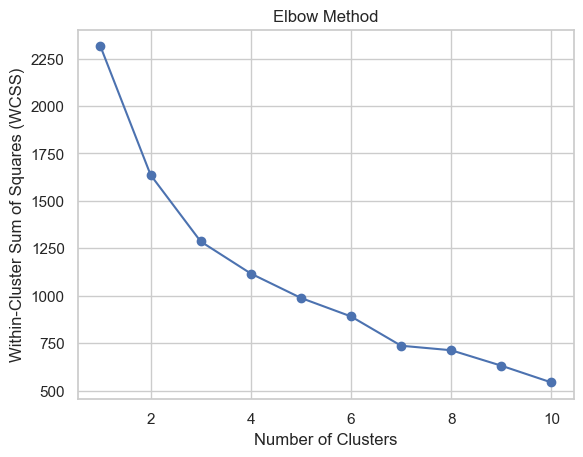

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Select the numerical columns for clustering
X = df.select_dtypes(include=['float64'])

# Initialize SimpleImputer with strategy='mean' to impute missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the numerical columns
X_imputed = imputer.fit_transform(X)

# Convert the imputed array back to a DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)


# Initialize an empty list to store the within-cluster sum of squares
wcss = []

# Try different numbers of clusters and compute WCSS for each
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_imputed_df)
    wcss.append(kmeans.inertia_)

# Plot the WCSS vs. number of clusters
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


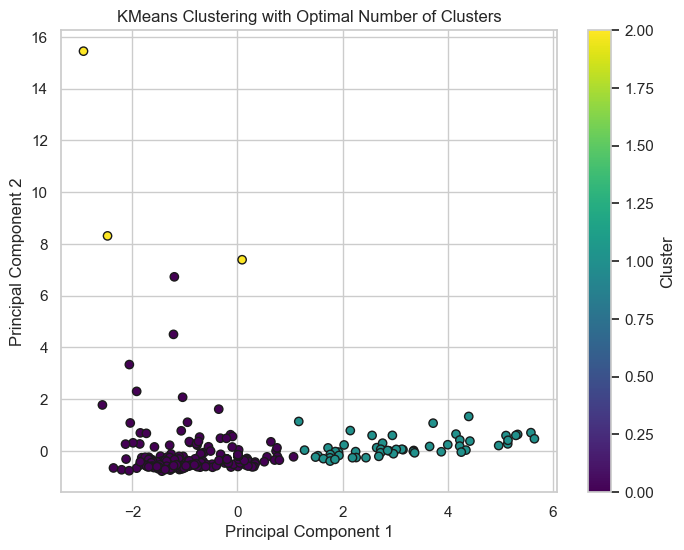

In [19]:
from sklearn.decomposition import PCA

# Initialize PCA with 2 components for visualization
pca = PCA(n_components=2)

# Fit PCA to the data and transform it
X_pca = pca.fit_transform(X_imputed_df)

# Fit a KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, init='k-means++', random_state=42)
kmeans.fit(X_imputed_df)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Visualize the clusters in a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k')
plt.title('KMeans Clustering with Optimal Number of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


-----

# 5. Model Interpretation


**TASK: What K value do you think is a good choice? Are there multiple reasonable choices? What features are helping define these cluster choices.**

<p>Determining the ideal number of clusters (K) and comprehending the properties of the clusters that are produced are essential steps in interpreting the KMeans clustering model. The elbow approach was used in the analysis to identify the proper K value. The point at which the rate of decrease in the within-cluster sum of squares (WCSS) slows down and indicates diminishing returns in clustering improvement was found by graphing the WCSS against various numbers of clusters. The elbow point for the selected dataset was found at K=3, indicating that three clusters may sufficiently represent the data's underlying structure. It's important to remember, though, that depending on the analysis's context, there may be more than one acceptable option for K, thus choosing K is not always straightforward. Other reasonable K values in this situation, like K=4 or K=5, should be investigated to see if they offer any insightful information about the data.</p>
<br>
<p>We can examine the cluster centroids to comprehend the characteristics defining these cluster selections. The average value of every characteristic inside a cluster is represented by its centroid. Through the analysis of centroid values for various K values, we are able to determine which features have the most impact on the separation of clusters. Cluster borders are probably influenced by features whose centroid values vary significantly between clusters. Further insights into the discriminative strength of each feature may also be gained by visualizing the distribution of features across clusters using box plots or scatter plots. Overall, to grasp the KMeans clustering results and comprehend the underlying structure of the data, a combination of statistical analysis and visual exploration is essential.</p>


---